# Table of contents
1. [Introduction](#introduction)
2. [Load train metrics](#loadmetrics)
3. [Plot metrics](#plotmetrics)

## Introduction <a name="introduction"></a>

In this notebook we load the training metrics which have been saved during training on the cluster and generate nice plots for visualization.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from helpers import set_size

/home/zenon/.local/share/miniconda3/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## Load train metrics <a name="loadmetrics"></a>

The metrics have been saved to YOLO's `runs` directory in a file called `results.txt`. The file does not contain headers, unfortunately, so we have to set them manually here.

In [2]:
#df = pd.read_csv('../../classification/yolo-second-run/runs/train/yolov7-custom7/results.txt',
df = pd.read_csv('results-final.txt',
                 delimiter=',',
                 names=['epoch', 'mem', 'train/box_loss', 'train/obj_loss', 'train/cls_loss', 'total', 'target', 'img_size', 'precision', 'recall', 'mAP_0.5', 'mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss'])
df['f1'] = 2 * np.divide(df['precision'] * df['recall'],
                         df['precision'] + df['recall'])
df['fitness'] = 0.1 * df['mAP_0.5'] + 0.9 * df['mAP_0.5:0.95']
df

,epoch,mem,train/box_loss,train/obj_loss,train/cls_loss,total,target,img_size,precision,recall,mAP_0.5,mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,f1,fitness
0,0/69,7.28G,0.02551,0.011000,0,0.03651,12,640,0.7350,0.5716,0.6676,0.5290,0.02950,0.005770,0,0.643083,0.54286
1,1/69,7.27G,0.02155,0.010970,0,0.03252,6,640,0.7681,0.6184,0.7172,0.5787,0.02820,0.005597,0,0.685168,0.59255
2,2/69,7.27G,0.02127,0.010850,0,0.03212,22,640,0.7820,0.5965,0.7014,0.5684,0.02819,0.005582,0,0.676769,0.58170
3,3/69,7.27G,0.02089,0.010820,0,0.03170,9,640,0.7795,0.6028,0.7099,0.5858,0.02629,0.005540,0,0.679856,0.59821
4,4/69,7.28G,0.02061,0.010730,0,0.03135,33,640,0.7653,0.6153,0.7170,0.5929,0.02638,0.005602,0,0.682151,0.60531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,65/69,7.25G,0.01648,0.008796,0,0.02527,14,640,0.7416,0.6157,0.6932,0.5738,0.02396,0.006050,0,0.672811,0.58574
66,66/69,7.25G,0.01645,0.008787,0,0.02524,8,640,0.7360,0.6175,0.6915,0.5715,0.02398,0.006076,0,0.671563,0.58350
67,67/69,7.25G,0.01629,0.008693,0,0.02499,3,640,0.7511,0.6058,0.6895,0.5694,0.02401,0.006101,0,0.670670,0.58141
68,68/69,7.25G,0.01627,0.008705,0,0.02498,27,640,0.7536,0.6024,0.6883,0.5680,0.02404,0.006127,0,0.669570,0.58003


To be able to plot multiple lines in one plot, seaborn expects a _merged_ dataframe.

In [3]:
df = df.loc[:,~df.columns.isin(['mem', 'train/cls_loss', 'total', 'target', 'img_size', 'val/cls_loss'])]
df['epoch'] = df.index
df_aranged = df[['epoch', 'precision', 'recall']]
df_aranged = df_aranged.melt(id_vars=['epoch'], var_name='metric', value_name='value') # df is your dataframe
df_aranged

/home/zenon/.local/share/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,epoch,metric,value
0,0,precision,0.7350
1,1,precision,0.7681
2,2,precision,0.7820
3,3,precision,0.7795
4,4,precision,0.7653
...,...,...,...
135,65,recall,0.6157
136,66,recall,0.6175
137,67,recall,0.6058
138,68,recall,0.6024


## Plot metrics <a name="plotmetrics"></a>

First, set the style of the plots to match with all other plots.

In [4]:
width = 418
sns.set_theme(style='whitegrid',
              rc={'text.usetex': True, 'font.family': 'serif', 'axes.labelsize': 10,
                  'font.size': 10, 'legend.fontsize': 8,
                  'xtick.labelsize': 8, 'ytick.labelsize': 8})

Second, specify the save directory for the plots.

In [5]:
fig_save_dir = '../../thesis/graphics/'

Third, point seaborn to the dataframe and specify how to discriminate the two metrics (precision and recall). In this case, the different metrics are stored under the dataframe column `metrics` and thus we specify it for `style`.

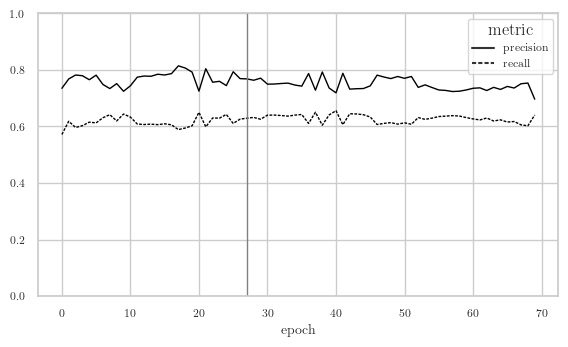

In [7]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width, subplots=(1,1)))
sns.lineplot(x='epoch', y='value', style='metric', dashes=["", (2,1)], data=df_aranged,
             color='black', linewidth=1)
ax.set_ylim([0, 1])
#ax.set_xticks(np.arange(0, 70, 50))
ax.set_ylabel('')
ax.axvline(27, 0, 1, lw=1, color='grey')
fig.tight_layout()
fig.savefig(fig_save_dir + 'precision_recall_final.pdf', format='pdf', bbox_inches='tight')

Plot the box and object loss during training. YOLO usually reports a third loss (`cls_loss`) which is in this case always zero because we only have one class (_Plant_).

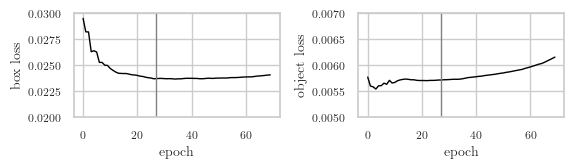

In [14]:
fig, ax = plt.subplots(1, 2, figsize=set_size(width, subplots=(1,2)))
sns.lineplot(x=df.index, y='val/box_loss', data=df, ax=ax[0], color='black', linewidth=1)
sns.lineplot(x=df.index, y='val/obj_loss', data=df, ax=ax[1], color='black', linewidth=1)
ax[0].set_ylim([0.02, 0.03])
#ax[0].set_xticks(np.arange(0, 350, 50))
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('box loss')
ax[0].axvline(27, 0, 1, lw=1, color='grey')

ax[1].set_ylim([0.005, 0.007])
#ax[1].set_xticks(np.arange(0, 350, 50))
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('object loss')
ax[1].axvline(27, 0, 1, lw=1, color='grey')

fig.tight_layout()
fig.savefig(fig_save_dir + 'val_box_obj_loss_final.pdf', format='pdf', bbox_inches='tight')

Plot the fitness of the model per epoch. The best weights are selected based on fitness, which is why the vertical gray line marks the best fitness at epoch 133. Fitness is calculated as the weighted average of `mAP@0.5` and `mAP@0.5:0.95` with the weighting 0.1 and 0.9, respectively.

0.61718


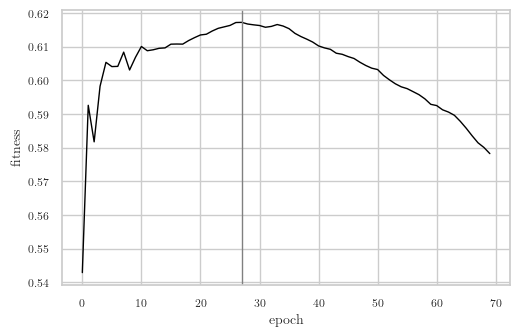

In [18]:
fig, ax = plt.subplots(1, 1, figsize=set_size(width, subplots=(1,1)))
ax = sns.lineplot(x=df.index, y='fitness', data=df, color='black', linewidth=1)
ax.axvline(27, 0, 1, lw=1, color='grey')
ax.set_xlabel('epoch')
print(df['fitness'].max())
fig.savefig(fig_save_dir + 'model_fitness_final.pdf', format='pdf', bbox_inches='tight')